# 分析 final_solutions.csv ，通过代码作图，显示三维 Pareto Front

**独立代码块**

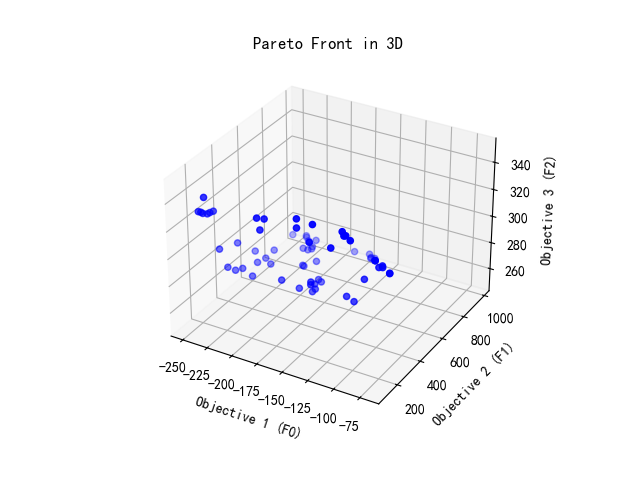

In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.loadtxt("final_solutions.csv", delimiter=",")

# data.shape = (N, 15)
# 假设前 12 列是决策变量 X，后 3 列是目标值 F。
X = data[:, :12]   # (N, 12)
F = data[:, 12:]   # (N, 3)

# 这里假设 F 里的三列已经是我们要画的数值(若需反转/还原，请在此之前做)
f0 = F[:, 0]
f1 = F[:, 1]
f2 = F[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(f0, f1, f2, c='b', marker='o')

ax.set_xlabel("Objective 1 (F0)")
ax.set_ylabel("Objective 2 (F1)")
ax.set_zlabel("Objective 3 (F2)")
plt.title("Pareto Front in 3D")

plt.show()


# 读取 res_history 文件，分析代际间适应度优化的趋势
**独立代码块**

**以单目标为例: 逐代计算最小值、平均值**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("res_history.npz", allow_pickle=True)
final_X = data["final_X"]  # (n_nd, n_var), 最终非支配解/最优解
final_F = data["final_F"]  # (n_nd, n_obj)
history_F = data["history_F"]  # (n_gen,) 个元素, 每个元素 shape=(pop_size, n_obj)

# 打印信息:
print("final_X.shape:", final_X.shape)
print("final_F.shape:", final_F.shape)
print("历代数量 = ", len(history_F))

# 以单目标为例: 逐代计算最小值、平均值
best_per_gen = []
avg_per_gen = []
for gen_idx, F_gen in enumerate(history_F):
    best_val = np.min(F_gen[:, 0])   # 第0列目标, shape=(pop_size,)
    avg_val  = np.mean(F_gen[:, 0])
    best_per_gen.append(best_val)
    avg_per_gen.append(avg_val)

# 绘制
gen_axis = np.arange(1, len(history_F)+1)
plt.figure()
plt.plot(gen_axis, best_per_gen, label="Best of Gen")
plt.plot(gen_axis, avg_per_gen, label="Mean of Gen")
plt.xlabel("Generation")
plt.ylabel("Objective Value")
plt.title("Convergence Over Generations")
plt.legend()
plt.show()


In [ ]:
# 加载存储的文件
data = np.load("res_history.npz", allow_pickle=True)
print(data.files)  # ['final_X', 'final_F', 'history_F']

final_X = data["final_X"]
final_F = data["final_F"]
history_F = data["history_F"]  # 这是一个 list，每一项是每代的 F

# 可以计算并绘制最优解、平均解的变化
import matplotlib.pyplot as plt
best_per_gen = []
avg_per_gen = []

for F_gen in history_F:
    best_per_gen.append(np.min(F_gen[:, 0]))  # 单目标最小值
    avg_per_gen.append(np.mean(F_gen[:, 0]))  # 单目标平均值

# 绘制收敛图
plt.figure()
plt.plot(range(1, len(history_F)+1), best_per_gen, label="Best of Gen")
plt.plot(range(1, len(history_F)+1), avg_per_gen, label="Average of Gen")
plt.xlabel("Generation")
plt.ylabel("Objective Value")
plt.title("Convergence Over Generations")
plt.legend()
plt.show()


# 每一代（generation）和非支配解（nondominated solutions）文件，分析判断算法的优化趋势与收敛性
**独立代码块，需要自定义chkpt_dir与n_gen**

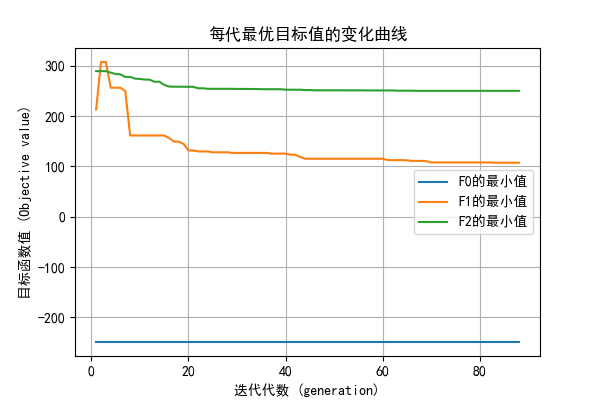

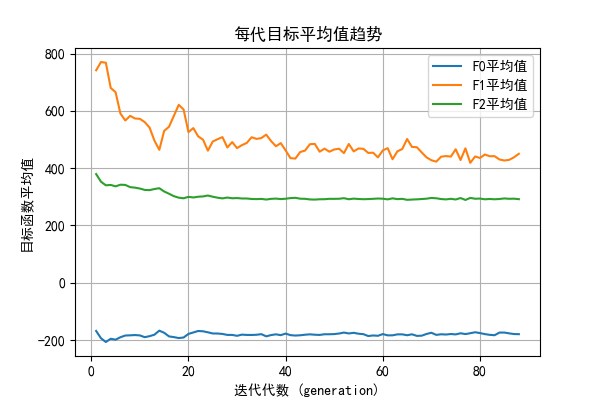

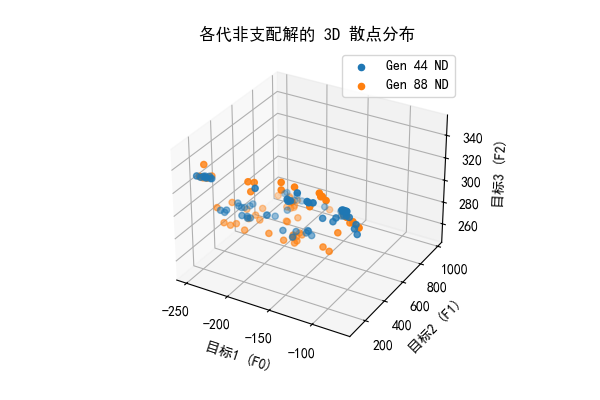

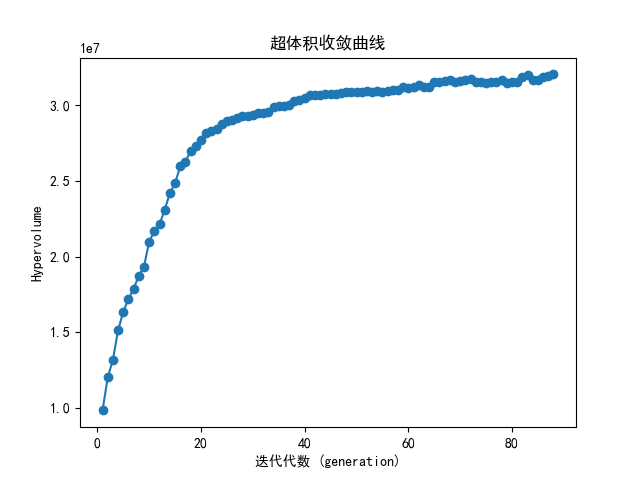

In [1]:
%matplotlib widget
import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 指定一个支持中文的字体，比如 Windows 上常见的 "SimHei" (黑体)
matplotlib.rcParams["font.sans-serif"] = ["SimHei"]  
matplotlib.rcParams["axes.unicode_minus"] = False    # 正常显示负号
from pymoo.indicators.hv import HV

chkpt_dir = r"F:\ResearchMainStream\0.ResearchBySection\C.动力学模型\参数优化\参数优化实现\ParallelSweepSimpack\结果分析组\0204早一致性评价"  # 保存 generation_xxx.npz 的目录
n_gen = 88            # 总迭代轮次
n_obj = 3             # 你的目标函数个数

# 存储每一代的整个种群目标值（适应度函数）
all_F_history = []  # 这是一个列表，元素为 F_gen 数组 (pop_size, n_obj)

for gen in range(1, n_gen+1):
    filename = os.path.join(chkpt_dir, f"generation_{gen}.npz")
    data = np.load(filename)
    F_gen = data["F"]  # 形如 (pop_size, n_obj)
    all_F_history.append(F_gen)

# 现在 all_F_history[0] 对应第1代的所有目标值 (pop_size, n_obj),
# all_F_history[1] 对应第2代的所有目标值, ... 依次类推。

# 对于每一代，计算 F_gen 在所有个体上的最小值(逐个目标)
best_per_gen = np.zeros((n_gen, n_obj))  # shape = (88, 3)

for i in range(n_gen):
    F_gen = all_F_history[i]  # (pop_size, n_obj)
    # 计算 3 个目标各自的最小值
    best_per_gen[i, :] = F_gen.min(axis=0)

# 绘制收敛图
plt.figure(figsize=(6,4))
gen_axis = np.arange(1, n_gen+1)  # x轴为第1到第88代
for j in range(n_obj):
    plt.plot(gen_axis, best_per_gen[:, j], label=f"F{j}的最小值")
plt.xlabel("迭代代数 (generation)")
plt.ylabel("目标函数值 (Objective value)")
plt.title("每代最优目标值的变化曲线")
plt.legend()
plt.grid(True)
plt.show()

# 每一代，计算 F_gen 平均值
avg_per_gen = np.zeros((n_gen, n_obj))  # 用于存储每一代 3 个目标的平均值

for i in range(n_gen):
    F_gen = all_F_history[i]
    avg_per_gen[i, :] = F_gen.mean(axis=0)  # 计算该代目标值的均值

# 绘制平均值随迭代的变化
gen_axis = np.arange(1, n_gen + 1)  # [1, 2, ..., 88]
plt.figure(figsize=(6,4))
for j in range(n_obj):
    plt.plot(gen_axis, avg_per_gen[:, j], label=f"F{j}平均值")

plt.xlabel("迭代代数 (generation)")
plt.ylabel("目标函数平均值")
plt.title("每代目标平均值趋势")
plt.legend()
plt.grid(True)
plt.show()


fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')

for gen in [44, 88]:  # 只示例第1代和第88代
    filename_nd = os.path.join(chkpt_dir, f"generation_{gen}_nondom.npz")
    data_nd = np.load(filename_nd)
    F_nd = data_nd["F"]  # (n_nd, n_obj) 这里 n_obj=3
    ax.scatter(F_nd[:,0], F_nd[:,1], F_nd[:,2], label=f"Gen {gen} ND")

ax.set_xlabel("目标1 (F0)")
ax.set_ylabel("目标2 (F1)")
ax.set_zlabel("目标3 (F2)")
ax.legend()
ax.set_title("各代非支配解的 3D 散点分布")
plt.show()

# 高维指标：超体积 (Hypervolume) 或 IGD
# 在多目标优化中，衡量优化质量和收敛性的常用指标还包括 超体积（hypervolume, HV）、GD/IGD（Generational Distance / Inverted Generational Distance）等。
# 通过计算每一代的非支配解的超体积，可以看到随着迭代次数增加，超体积是否单调增加并逐渐收敛。
# 这类指标能够更全面地衡量多目标收敛和分布情况，尤其是当目标数大于 2 或 3 时更为重要。
# 如果需要计算超体积，pymoo 自带了一些指标工具，可以参考 pymoo文档 或者自行使用常见的 HV 算法包。

MAXoverUB_F1 = 0
MAXoverUB_F2 = 1000
MAXoverUB_F3 = math.sqrt(3 * 3 + 3 * 3) * 100 # 由约束定义上限

# 设定一个参考点 (reference point)，大于或等于所有解的最大目标值
ref_point = np.array([MAXoverUB_F1, MAXoverUB_F2, MAXoverUB_F3])

hv_indicator = HV(ref_point=ref_point)

hv_values = []
for gen in range(1, n_gen+1):
    filename_nd = os.path.join(chkpt_dir, f"generation_{gen}_nondom.npz")
    data_nd = np.load(filename_nd)
    F_nd = data_nd["F"]  # (n_nd, 3)
    hv = hv_indicator.do(F_nd)
    hv_values.append(hv)

# hv_values[i] 就是第 i 代的超体积
fig = plt.figure()
plt.plot(range(1, n_gen+1), hv_values, marker='o')
plt.xlabel("迭代代数 (generation)")
plt.ylabel("Hypervolume")
plt.title("超体积收敛曲线")
plt.show()

# Markdown 占位

In [3]:
# 代码占位
